# Lattices: visualization and further examples

This notebook demonstrates a few ways to visualize lattices and couplings inside the lattice.

In [1]:
import tenpy

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tenpy.models import lattice

In the following, we will focus on the Honeycomb lattice as an example with a non-trivial unit cell.
If you want to try it out yourself for a different lattice, simply adjust the following alias:

In [3]:
MyLattice = lattice.Honeycomb
Lu = MyLattice.Lu  # = 2 = the number of sites in the unit cell
fig_args = dict(figsize=(7, 5))
#fig_args = dict(figsize=(7, 5), dpi=150)  # uncomment this if the figures appear too small to see something

## plotting the lattice itself

To get started, let's recall that a lattice consists of a unit cell that is repeated in the directions of the basis. The following plot visualizes the first unit cell and basis and plots the sites in the whole lattice.
For the Honeycomb lattice, we have two different sites in the unit cell, which get visualized by different markers.

In [4]:
lat = MyLattice(5, 4, sites=None, bc='periodic')

(-1, 5.525)

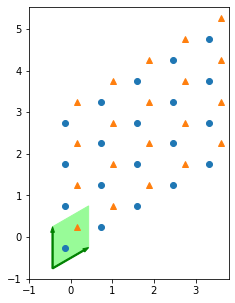

In [5]:
plt.figure(**fig_args)
ax = plt.gca()
lat.plot_sites(ax)
ax.set_aspect('equal')

lat.plot_basis(ax, origin=-0.5*(lat.basis[0] + lat.basis[1]))
ax.set_xlim(-1)
ax.set_ylim(-1)

We can also plot the nearest- and next-nearest-neighbor bonds:

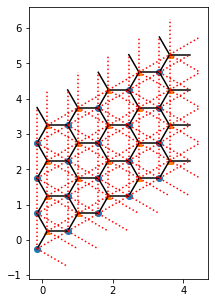

In [6]:
plt.figure(**fig_args)
ax = plt.gca()
lat.plot_sites(ax)
lat.plot_coupling(ax)
lat.plot_coupling(ax, lat.pairs['next_nearest_neighbors'], linestyle=':', color='r')
ax.set_aspect('equal')

If you have a 1D MPS, it's winding through the lattice is defined by the `order`. You can plot it as follows:

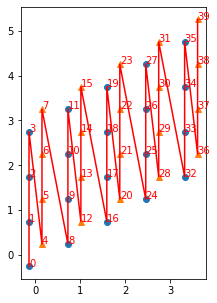

In [7]:
plt.figure(**fig_args)
ax = plt.gca()
lat.plot_sites(ax)
lat.plot_order(ax)
ax.set_aspect('equal')


## Visually verifying pairs of couplings by plotting them

In this section, we *visually* verify that the lattice `pairs` like the `nearest_neighbors` are indeed what they claim to be. To acchieve this, we first get all the possible distances of them, plot circles with these distances and lines connecting the points for each distance. 

Then, **you** have to **stare at the plots and verify** that these couplings include all pairs you want to have.

In [8]:
lat = MyLattice(12, 12, sites=None, bc='periodic') # the lattice to plot
lat_pairs = lat.pairs # the coupling pairs to plot

In [9]:
# get distances of the couplings
dist_pair = {}
for pair in lat_pairs:
    #print(pair)
    dist = None
    for u1, u2, dx in lat_pairs[pair]:
        d = lat.distance(u1, u2, dx)
        #print(u1, u2, dx, d)
        if dist is None:
            dist = d
            dist_pair[d] = pair
        else:
            assert abs(dist-d) < 1.e-14
            
dists = sorted(dist_pair.keys())
if len(dists) != len(dist_pair):
    raise ValueError("no unique mapping dist -> pair")

In [10]:
print("(dist)   (pairs)")
for d in dists:
    print("{0:.6f} {1}".format(d, dist_pair[d]))

(dist)   (pairs)
0.577350 nearest_neighbors
1.000000 next_nearest_neighbors
1.154701 next_next_nearest_neighbors
1.527525 fourth_nearest_neighbors
1.732051 fifth_nearest_neighbors


In [11]:
colors = [plt.cm.viridis(r/dists[-1]) for r in dists]
centers = np.array([[3, 3, 0], [8, 3, 1], [3, 8, 2], [8, 8, 3]]) # one center for each site in the unit cell
us = list(range(Lu))

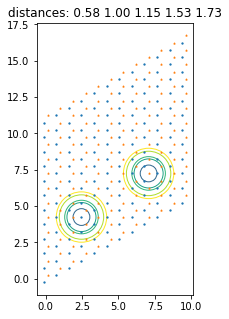

In [12]:
fig = plt.figure(**fig_args)
ax = plt.gca()

lat.plot_sites(ax, markersize=1.3)
for u, center in zip(us, centers):
    center = lat.position(center)
    for r, c in zip(dists, colors):
        circ = plt.Circle(center, r, fill=False, color=c)
        ax.add_artist(circ)

ax.set_aspect(1.)
t = ax.set_title("distances: " + ' '.join(['{0:.2f}'.format(d) for d in dists]))

0.5773502691896258 nearest_neighbors
0 1 [0 0] 0.5773502691896258
1 0 [1 0] 0.5773502691896257
1 0 [0 1] 0.5773502691896258
1 0 [0 0] 0.5773502691896258
0 1 [-1  0] 0.5773502691896257
0 1 [ 0 -1] 0.5773502691896258
0.9999999999999999 next_nearest_neighbors
0 0 [1 0] 0.9999999999999999
0 0 [0 1] 1.0
0 0 [ 1 -1] 0.9999999999999999
1 1 [1 0] 0.9999999999999999
1 1 [0 1] 1.0
1 1 [ 1 -1] 0.9999999999999999
0 0 [-1  0] 0.9999999999999999
0 0 [ 0 -1] 1.0
0 0 [-1  1] 0.9999999999999999
1 1 [-1  0] 0.9999999999999999
1 1 [ 0 -1] 1.0
1 1 [-1  1] 0.9999999999999999
1.1547005383792515 next_next_nearest_neighbors
1 0 [1 1] 1.1547005383792515
0 1 [-1  1] 1.1547005383792515
0 1 [ 1 -1] 1.1547005383792515
0 1 [-1 -1] 1.1547005383792515
1 0 [ 1 -1] 1.1547005383792515
1 0 [-1  1] 1.1547005383792515
1.5275252316519468 fourth_nearest_neighbors
0 1 [0 1] 1.5275252316519468
0 1 [1 0] 1.5275252316519465
0 1 [ 1 -2] 1.5275252316519465
0 1 [ 0 -2] 1.5275252316519468
0 1 [-2  0] 1.5275252316519465
0 1 [-2  1] 1

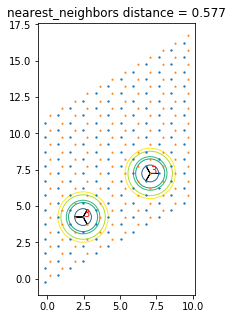

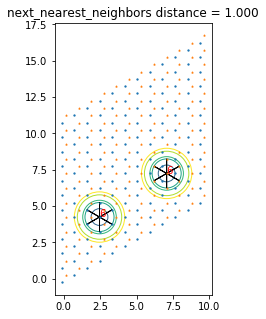

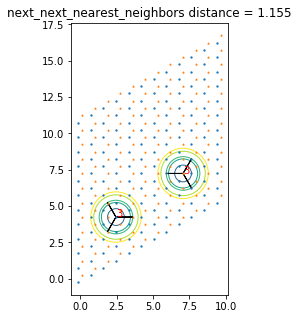

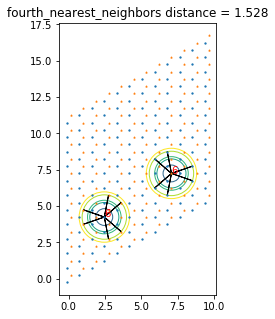

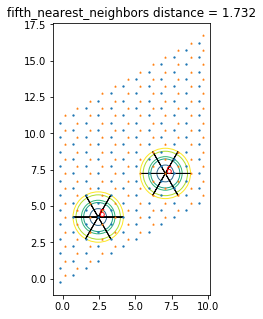

In [13]:
for dist in dists:
    pair_name = dist_pair[dist]
    print(dist, pair_name)
    pairs = lat.pairs[pair_name]
    fig = plt.figure(**fig_args)
    ax = plt.gca()
    lat.plot_sites(ax, markersize=1.3)
    for u, center in zip(us, centers):
        center = lat.position(center)
        for r, c in zip(dists, colors):
            circ = plt.Circle(center, r, fill=False, color=c)
            ax.add_artist(circ)
    pairs_with_reverse = pairs + [(u2, u1, -np.array(dx)) for u1, u2, dx in pairs]
    for u1, u2, dx in pairs_with_reverse:
        print(u1, u2, dx, lat.distance(u1, u2, dx))
        start = centers[u1]
        end = start.copy()
        end[-1] = u2
        end[:-1] = start[:-1] + dx
        x1, y1 = lat.position(start)
        x2, y2 = lat.position(end)
        ax.arrow(x1, y1, x2-x1, y2 - y1)
    for u in us:
        x, y = lat.position(centers[u])
        number = lat.count_neighbors(u, pair_name)
        ax.text(x, y, str(number), color='r')
    ax.set_aspect(1.)
    ax.set_title(pair_name + ' distance = {0:.3f}'.format(dist))